In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time, datetime

In [2]:
df = pd.read_csv('/home/subhranil/Documents/data science/My Uber Drives - 2016.csv')

In [3]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
#replacing * with with nothing
df.columns = df.columns.str.replace("*","")

In [6]:
#drop the last row showing total and others
df.drop(index=1155,inplace=True)

In [7]:
#checking null values
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [8]:
#fill up NA values
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [9]:
#checking for number of null values in each columns
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [10]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [11]:
#converting object to date time in the following columns
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [13]:
#frequency of start locations
start = df['START'].value_counts()

In [14]:
#checking the freq count of each start locations
start[start>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64

In [15]:
#checking the freq count of each stop locations
stop = df['STOP'].value_counts()
stop[stop>10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

In [16]:
#freq of miles covered in rides
miles=df['MILES'].value_counts()
miles[miles>10]

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64

Text(0.5, 1.0, 'frequency of miles covered')

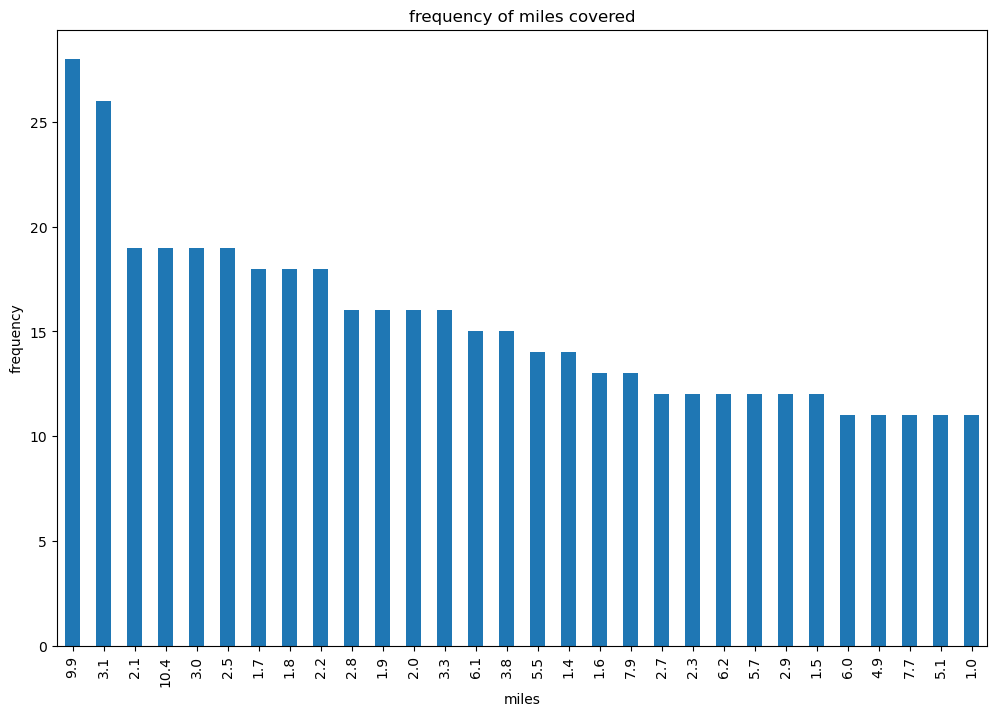

In [17]:
#plotting freq certain amount of ciles covered
plt.figure(figsize=(12,8))
miles[miles>10].plot(kind='bar')
plt.xlabel('miles')
plt.ylabel('frequency')
plt.title('frequency of miles covered')

In [18]:
df['PURPOSE'].value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [19]:
#grouping the diffrent purposes and finding the mean of miles travelled due to the purpose
df.groupby(['PURPOSE'])['MILES'].mean()

PURPOSE
Airport/Travel      14.953704
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      16.065806
Errand/Supplies      5.928902
Meal/Entertain       5.773878
Meeting             12.652597
Moving               4.550000
Temporary Site      11.016327
Name: MILES, dtype: float64

In [20]:
#grouping purpose and finding the aggregiate value of max and min of the distances travelled due to the specific purpose
df.groupby(['PURPOSE']).agg({'MILES':['mean',max,min]})

MILES              
                       mean    max    min
PURPOSE                                  
Airport/Travel    14.953704  156.9    0.9
Between Offices   10.944444   39.2    1.9
Charity ($)       15.100000   15.1   15.1
Commute          180.200000  180.2  180.2
Customer Visit    16.065806  310.3    0.6
Errand/Supplies    5.928902  195.3    0.5
Meal/Entertain     5.773878   36.5    0.6
Meeting           12.652597  201.0    0.7
Moving             4.550000    6.1    3.3
Temporary Site    11.016327  195.6    0.7

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

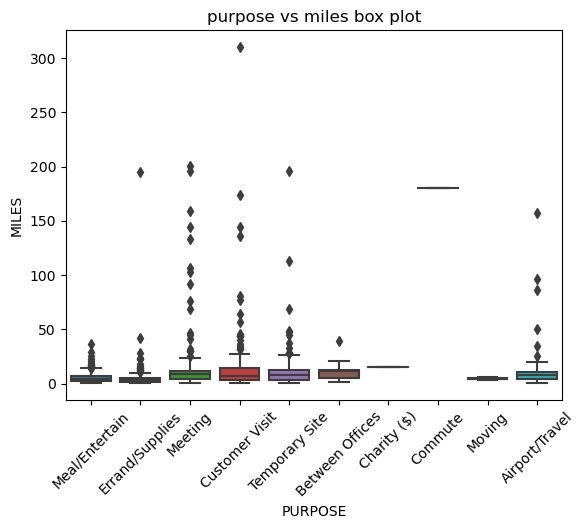

In [21]:
sns.boxplot(data=df,x=df['PURPOSE'],y = df['MILES'])
plt.title('purpose vs miles box plot')
plt.xticks(rotation=45)

In [22]:
#time taken for the ride
df['time'] = df.END_DATE-df.START_DATE

In [23]:
#time taken in seconds in the ride
df['seconds'] = df['time'].dt.total_seconds()/60

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

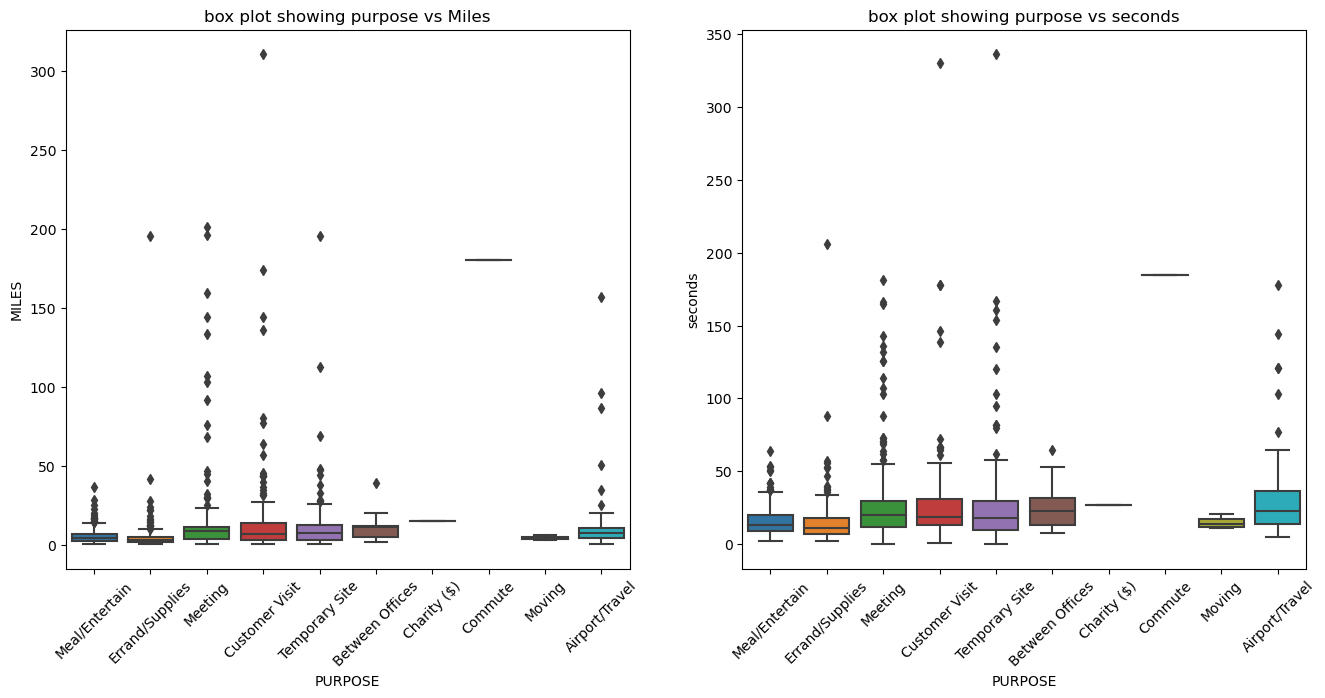

In [24]:
#plotting box plot between purpose vs miles and purpose vs time taken in seconds
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.title("box plot showing purpose vs Miles")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.seconds)
plt.title("box plot showing purpose vs seconds")
plt.xticks(rotation=45)


In [25]:
#finding the month of booking
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

In [26]:
df['month']

0        1
1        1
2        1
3        1
4        1
        ..
1150    12
1151    12
1152    12
1153    12
1154    12
Name: month, Length: 1155, dtype: int64

In [27]:
#creating a dictionary to assign month index with the month names
dic = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [28]:
#the month number in the months columns will be updated with ntheir names
df['month'] = df['month'].map(dic)

In [29]:
df['month']

0       jan
1       jan
2       jan
3       jan
4       jan
       ... 
1150    dec
1151    dec
1152    dec
1153    dec
1154    dec
Name: month, Length: 1155, dtype: object

In [30]:
df['month'] = pd.Series(df['month'], dtype='object')

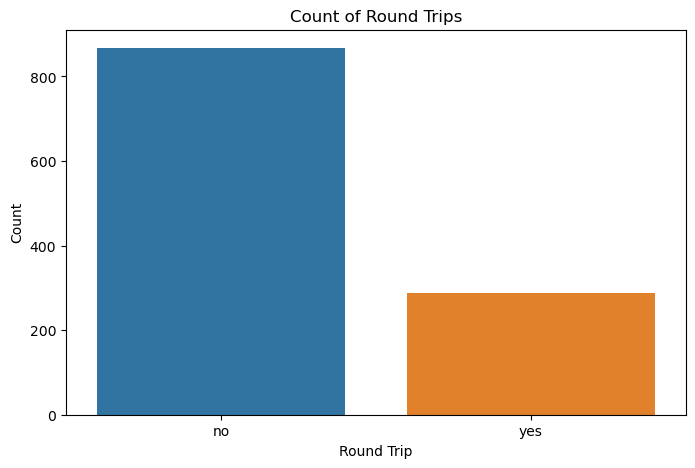

In [31]:
#find and plot number of round trips
def round_trip(row):
    if row['START'] == row['STOP']:
        return 'yes'
    else:
        return 'no'
df['Round_trip'] = df.apply(round_trip, axis=1)#applying round_trip function data into round_trip column
df['Round_trip'] = df['Round_trip'].astype('category')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Round_trip')
plt.xlabel('Round Trip')
plt.ylabel('Count')
plt.title('Count of Round Trips')
plt.show()


In [32]:
#counting number of round trips and single trips
df['Round_trip'].value_counts()


no     867
yes    288
Name: Round_trip, dtype: int64

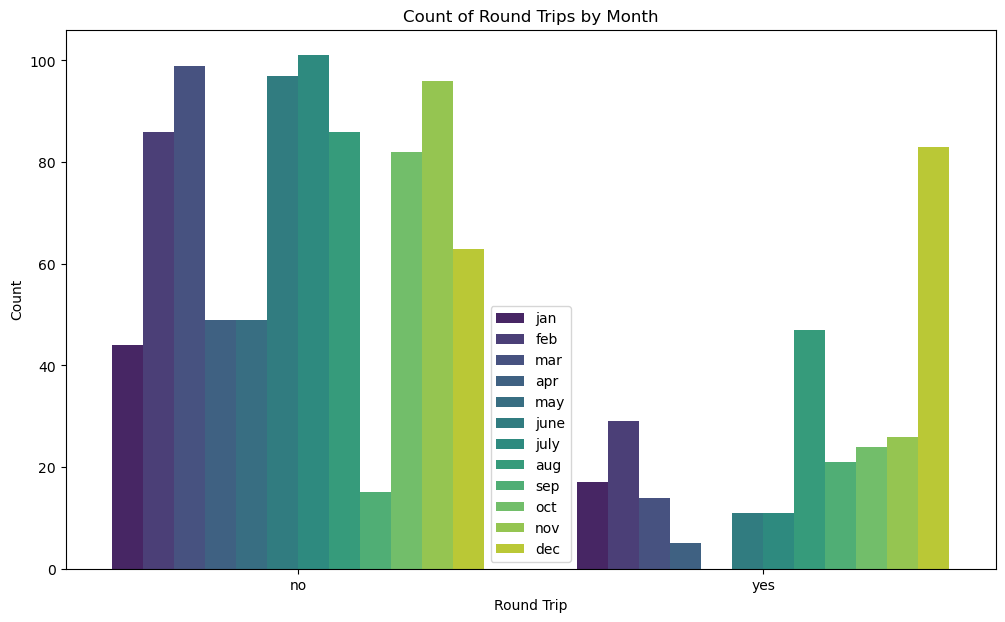

In [33]:
#counting the number of round trips in each of the months
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Round_trip', hue='month', palette='viridis')

plt.xlabel('Round Trip')
plt.ylabel('Count')
plt.title('Count of Round Trips by Month')
plt.legend()  # Show the legend
plt.show()


In [34]:
#counting number of round trips and single trips in each month
a = df.groupby(['month','Round_trip']).agg({'Round_trip':'count'})
a.columns = ['countdata']
a =a.reset_index()
a

,month,Round_trip,countdata
0,apr,no,49
1,apr,yes,5
2,aug,no,86
3,aug,yes,47
4,dec,no,63
5,dec,yes,83
6,feb,no,86
7,feb,yes,29
8,jan,no,44
9,jan,yes,17


In [35]:
#soring the above values
a[a['Round_trip']=='yes'].sort_values(by = ['countdata'],ascending=False)

,month,Round_trip,countdata
5,dec,yes,83
3,aug,yes,47
7,feb,yes,29
19,nov,yes,26
21,oct,yes,24
23,sep,yes,21
9,jan,yes,17
15,mar,yes,14
11,july,yes,11
13,june,yes,11


In [36]:
#showing all rows when df is printed
#pd.set_option('display.max_rows',None)
#df

In [37]:
#counting number of round trips and number of single trips for different purposes in the moth of december
df[df['month']=='dec'].groupby(['PURPOSE','month','Round_trip'])['month'].count()

PURPOSE          month  Round_trip
Airport/Travel   dec    no             0
                        yes            2
Between Offices  dec    no             0
                        yes            1
Customer Visit   dec    no            16
                        yes           10
Errand/Supplies  dec    no            11
                        yes           36
Meal/Entertain   dec    no            18
                        yes           13
Meeting          dec    no            12
                        yes           18
Temporary Site   dec    no             6
                        yes            3
Name: month, dtype: int64

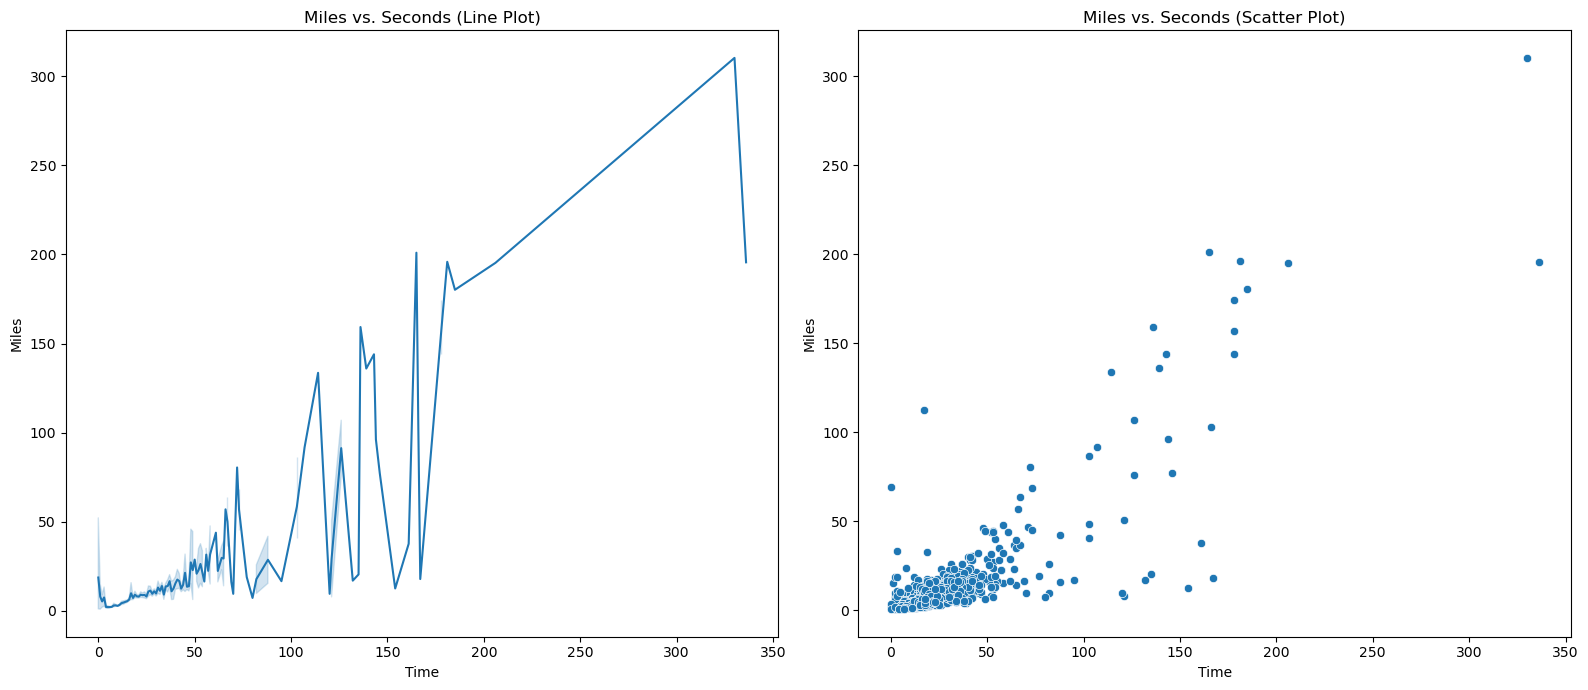

In [38]:
#plotting line plot and scatter plot
df['seconds'] = df['seconds'].astype('float64')

plt.figure(figsize=(16, 7))

# Line plot
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='seconds', y='MILES')
plt.xlabel('Time')
plt.ylabel('Miles')
plt.title('Miles vs. Seconds (Line Plot)')

# Scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='seconds', y='MILES')
plt.xlabel('Time')
plt.ylabel('Miles')
plt.title('Miles vs. Seconds (Scatter Plot)')

plt.tight_layout()  # Adjust subplot spacing

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

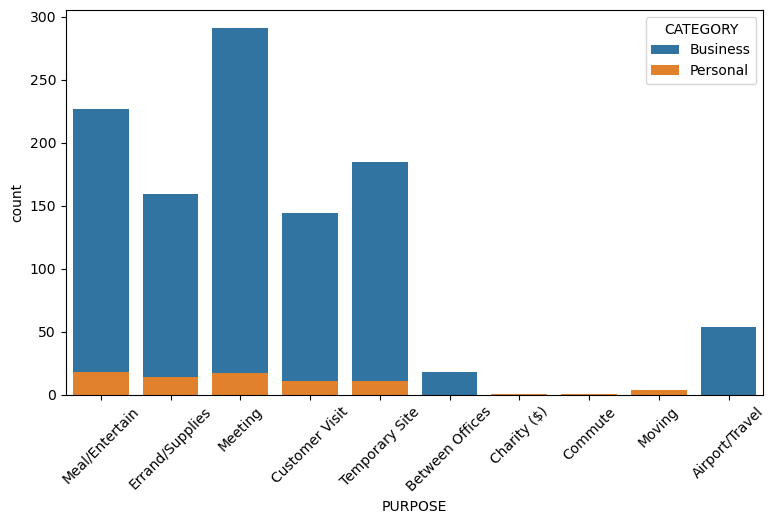

In [39]:
#checking the category of each purpose of the customers riding uber
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)

In [40]:
#counting the freq of start location of each category.
a = df.groupby(['CATEGORY','START']).agg({'START':'count'})
a.columns=['countdata']
a.reset_index()
a.reset_index().sort_values(by=['CATEGORY','countdata'],ascending=False)

,CATEGORY,START,countdata
201,Personal,Whitebridge,9
169,Personal,Banner Elk,7
183,Personal,Kissimmee,6
187,Personal,Morrisville,6
180,Personal,Islamabad,5
...,...,...,...
157,Business,Washington,1
158,Business,Washington Avenue,1
162,Business,West End,1
165,Business,Weston,1


In [41]:
#findind out the mean distance covered in miles of each category-business and personal. 
df.groupby(['CATEGORY'])['MILES'].mean()

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64